In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

In [3]:
from sklearn.datasets import load_iris

In [4]:
irs = load_iris()

In [8]:
df = pd.DataFrame(irs["data"], columns= irs["feature_names"])

In [9]:
df["target"] = irs["target"]

In [11]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

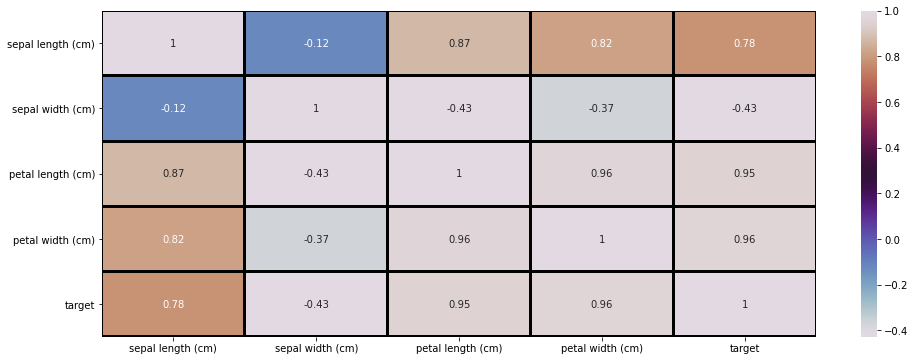

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linecolor="black", linewidths=2, cmap="twilight")

In [14]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

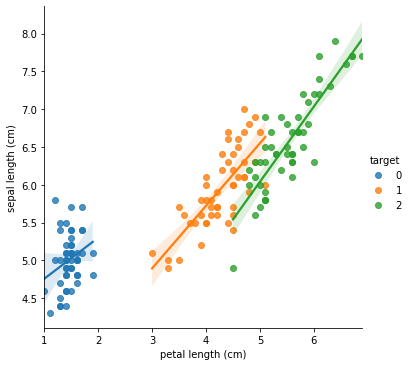

In [16]:
sns.lmplot(x = "petal length (cm)", y ="sepal length (cm)", data=df, hue="target")

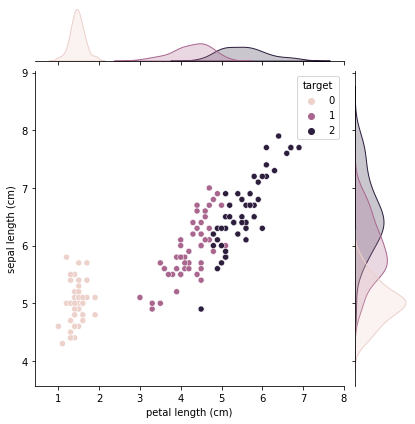

In [17]:
sns.jointplot(x = "petal length (cm)", y ="sepal length (cm)", data=df, hue="target")

In [19]:
X = df.drop("target", axis=1)
y = df["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
model = SVC()

In [23]:
model.fit(X_train, y_train)

SVC()

In [24]:
predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [27]:
gridParam = {"C": [.1,1,100,1000], "gamma": [0.1,0.01,0.001,0.0001]}

In [28]:
grid = GridSearchCV(SVC(), gridParam, verbose=3)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 3/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 4/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 5/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 1/5] END .............................C=0.1, gamma=0.001; total time=   0.0s
[CV 2/5] END .............................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [30]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [31]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [33]:
pred = grid.predict(X_test)

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [103]:
from random import randint
randomIndex = randint(0, len(df))
randomPlant = df.drop("target", axis=1).iloc[randomIndex]

In [104]:
X_train.shape

(105, 4)

In [105]:
randomPlant = randomPlant.values.reshape(1,4)

In [106]:
randomPlant

array([[4.9, 3.1, 1.5, 0.1]])

In [107]:
grid.predict(randomPlant)

array([0])

## True Value

In [108]:
df.iloc[randomIndex]["target"]

0.0